In [1]:
import torch
import numpy as np
from IPython.core.debugger import set_trace

In [2]:
a = torch.ones((3,2))
a[2,1] = 2
print(a)

tensor([[1., 1.],
        [1., 1.],
        [1., 2.]])


In [3]:
batch_t = torch.ones(2, 3, 5, 5)
batch_gray_naive = batch_t.mean(-3)
batch_gray_naive.shape

torch.Size([2, 5, 5])

In [4]:
weights = torch.tensor([0.2126, 0.7152, 0.0722])
unsqz_weights = weights.unsqueeze(-1).unsqueeze(-1)
batch_weights = (batch_t * unsqz_weights)
batch_weights.shape, unsqz_weights.shape

(torch.Size([2, 3, 5, 5]), torch.Size([3, 1, 1]))

In [5]:
batch_gray_weighted_fancy = torch.einsum('...chw,c->...hw', batch_t, weights)
batch_gray_weighted_fancy.shape

torch.Size([2, 5, 5])

In [6]:
a = np.ones((3,4))
b = np.random.randn(3,5)
c = np.einsum('Bi,Bj->Bij',a , b)
c.shape


(3, 4, 5)

In [7]:
import imageio
import matplotlib.pyplot as plt

In [8]:
img_arr = imageio.imread('practice_data/tiger.jpg')

img = torch.from_numpy(img_arr) #change channels to be at front, also change into torch tensor
out = img.permute(2, 0, 1)

out.shape



torch.Size([3, 4000, 6000])

In [9]:
#this would be for a batch of images so (batch, channel, h, w)
#why do they loop over c, could they not just do [:, :]?
batch = torch.randint(255, (5,3,256,256))

batch = batch*1.0
batch1 = batch
n_channels = batch.shape[1]
for c in range(n_channels):
    mean = torch.mean(batch[:, c])
    std = torch.std(batch[:, c])
    batch[:, c] = (batch[:, c] - mean) / std

batch1[:,:] = (batch1[:,:] - torch.mean(batch1[:, :])) / torch.std(batch1[:, :])

batch1[2,2,45,43], batch[2,2,45,43]


(tensor(0.0817), tensor(0.0817))

In [10]:
a = torch.Tensor(list(range(9)))
b= a.view(-1,1)
c = b[1:,1:]
b,c

(tensor([[0.],
         [1.],
         [2.],
         [3.],
         [4.],
         [5.],
         [6.],
         [7.],
         [8.]]),
 tensor([], size=(8, 0)))

In [11]:
with open('practice_data/1342-0.txt', encoding='utf8') as f:
    text = f.read()

In [12]:
lines = text.split('\n')
line = lines[200]
letter_t = torch.zeros(len(line), 128)
letter_t.shape, line

(torch.Size([68, 128]),
 '      Michaelmas, and some of his servants are to be in the house by')

In [13]:
for i, letter in enumerate(line.lower().strip()):
    letter_index = ord(letter) if ord(letter) < 128 else 0
    letter_t[i][letter_index] = 1
    
letter_t.shape
sum1 = torch.einsum('ij->', letter_t)
print(ord(','))

44


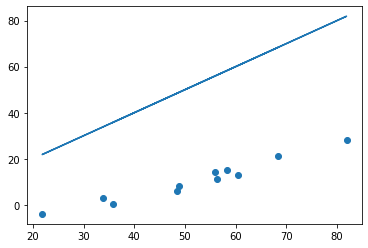

In [34]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

w = torch.ones(())\

b = torch.zeros(())
t_p = model(t_u, w, b)

loss = loss_fn(t_p, t_c)

plt.plot(t_u, t_p)
plt.scatter(t_u, t_c)

tensor(0.2863)
tensor(21.4290)
tensor(20.8567)
0.01
tensor(2.8615)
tensor(-2.9282)


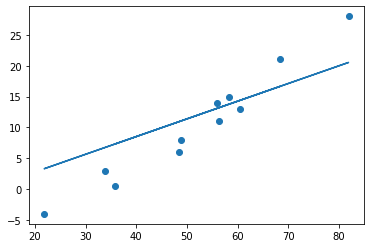

In [85]:
delta = 0.1
learning_rate_w = 1e-4
learning_rate = 1e-2
loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) -
    loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)



w=w - learning_rate_w * loss_rate_of_change_w
print(w)


print(loss_fn(model(t_u, w, b + delta), t_c))
print(loss_fn(model(t_u, w, b - delta), t_c))


loss_rate_of_change_b = \
    (loss_fn(model(t_u, w, b + delta), t_c) -
    loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

print(learning_rate)
print(loss_rate_of_change_b)
b=b- learning_rate * loss_rate_of_change_b
print(b)



t_p = model(t_u, w, b)

plt.plot(t_u, t_p)
plt.scatter(t_u, t_c)

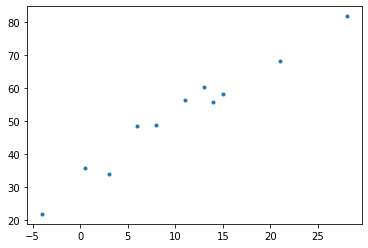

In [16]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

plt.scatter(t_c, t_u, marker = '.')

In [17]:
a = np.arange(100)
a = a.reshape(10,10)
rows = np.arange(10)

data = np.random.randint
a[rows, 0]

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [18]:
import torch.optim as optim
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

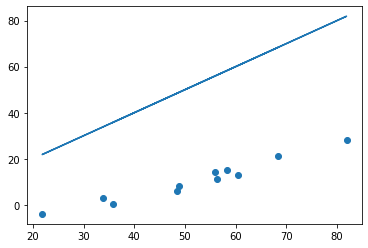

In [19]:
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
optimizer.zero_grad()
loss.backward()
optimizer.step()

plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.scatter(t_u, t_c)

Epoch 500, Loss 28.659660
Epoch 1000, Loss 28.212988
Epoch 1500, Loss 27.774076
Epoch 2000, Loss 27.342773
Epoch 2500, Loss 26.918962
Epoch 3000, Loss 26.502516
Epoch 3500, Loss 26.093292
Epoch 4000, Loss 25.691162
Epoch 4500, Loss 25.296022
Epoch 5000, Loss 24.907743


tensor([ 0.2577, -1.4631], requires_grad=True)

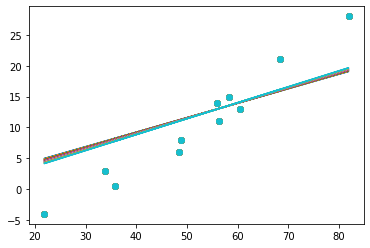

In [86]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            plt.plot(t_u.numpy(), t_p.detach().numpy())
            plt.scatter(t_u, t_c)
            
            
    return params

params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-4
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    t_u = t_u,
    t_c = t_c)

In [97]:
a = np.mgrid[0:5, 0:5][0]
b = np.arange(a.shape[0])
a[0,b], a

(array([0, 0, 0, 0, 0]),
 array([[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]]))